In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("TCS.csv")
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166


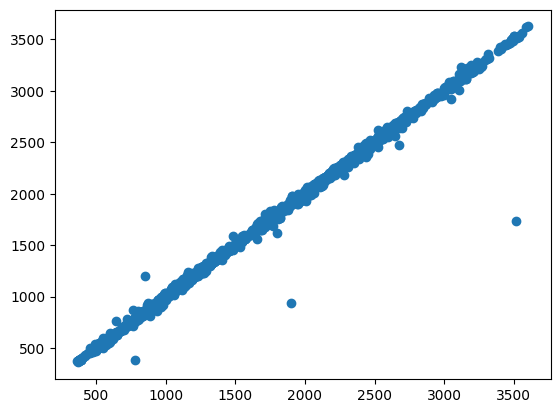

In [3]:
plt.scatter(data['Prev Close'],data['Open'])
plt.show()

In [4]:
sliced_x = data.iloc[:,1:3].join(data.iloc[:,4:8])
sliced_x.head()

,Symbol,Series,Open,High,Low,Last
0,TCS,EQ,1198.7,1198.7,979.00,985.00
1,TCS,EQ,992.0,997.0,975.30,976.85
2,TCS,EQ,982.4,982.4,958.55,961.20
3,TCS,EQ,969.9,990.0,965.00,986.40
4,TCS,EQ,986.5,990.0,976.00,987.80


In [5]:
from sklearn.preprocessing import LabelEncoder
toBeEncode = ['Symbol','Series']
encoder = LabelEncoder()
for col in toBeEncode:
    sliced_x[col]= encoder.fit_transform(sliced_x[col])

In [6]:
sliced_y = data.iloc[:,3].values
sliced_y

array([ 850.  ,  987.95,  979.  , ..., 3132.  , 3124.1 , 3115.25])

In [7]:
train_x, test_x , train_y, test_y = train_test_split(sliced_x.values,sliced_y,test_size=0.3)

In [8]:
regression = linear_model.LinearRegression()
regression.fit(train_x,train_y)

LinearRegression()

In [9]:
# Prediction
result = regression.predict(test_x)
print(f"Result: {result}")

Result: [ 854.65756915 1332.68860376 2553.91695017 ... 1393.69212613 2221.39672332
 2269.02554858]
